# Chapter 8: Dimensaionality Reduction

## Exercise 1
What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?

If you reduce the dimensionality of a dataset you will reduce the memory and time required to train a model. If the dimension is low enough you can even visualize the dataset and analyze the results obtained more easily.
The main drawback of reducing the dimensionality of a dataset is that you can end up losing some amount of information about the data.

## Exercise 2
What is the curse of dimensionality?

Higher dimensional datasets tend to be more sparse, so every instance ends up far away from other instances. The result of this is that models trained on high dimensional datasets tend to overfit the data.

## Exercise 3
Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Some algorithms (e.g. PCA) have a reverse transformation to obtain the original dataset. However, as discussed earlier, when we reduce the dimensionality of a dataset we also lose some information, so even after applying the reverse transformation we will not get exactly the original data.

## Exercise 4
Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

PCA can be use to reduce the dimensionality of most datasets. However, if there are no useless dimensions (e.g. Swiss roll), then reducing dimensionality with PCA will lose too much information.

## Exercise 5
Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

It depends on the dataset. We can reduce some datasets to more dimensions than others while retaining the same variance ratio.

## Exercise 6
In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA or Kernel PCA?

For vanilla PCA we need the dataset to fit in memory, but it should be the default choice. I would use incremental PCA when working with a huge dataset that doesn't fit in memory or for online tasks (we need to apply PCA on the fly, every time we get a new instance). Randomized PCA is faster than vanilla PCA, but it also requires the data to fit in memory. Finally, kernel PCA should be used with nonlinear datasets. 

## Exercise 7
How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

We have two options to measure the performance of a dimensionality reduction algorithm:
* After reducing the dimensionality of a dataset we can apply the reverse transformation to get the original data and see how much information we have lost.
* We can create a pipe where we have the dimensionality reduction algorithm and later on the model we want to train with the reduced data. Doing this we can try several algorithms and check which one performs best taking into account the performance of the final model, which uses the reduced data.

## Exercise 8
Does it make any sense to chain two different dimensionality reduction algorithms?

Yes, we can chain two different dimensionality reduction algorithms. For example, we can use PCA to quickly get rid of a large number of dimensions, and then apply another much slower dimensionality reduction algorithm (e.g. LLE) for the final dimensions.

## Exercise 9
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

digits = fetch_mldata('MNIST original')
X, y = digits['data'], digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=RANDOM_SEED)

Now that we have the MNIST data ready, we will train a Random Forest on it. We will use a default random forest, with no hyperparameter tuning:

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(random_state=RANDOM_SEED)
%timeit random_forest_clf.fit(X_train, y_train)

5.41 s ± 84.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now we can evaluate the model on the test data. We will just use accuracy as a measure of performance (it would be better to use other measures such as precision or recall for this dataset):

In [32]:
from sklearn.metrics import accuracy_score

y_pred = random_forest_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of random forest on original dataset: {:.2f}'.format(accuracy))

Accuracy of random forest on original dataset: 0.95


As we can see, we get around 95% accuracy using the original dataset. Now we will use PCA to reduce the dimension of the dataset, with a variance ratio of 95%:

In [33]:
from sklearn.decomposition import PCA

# if n_components is a float, it specifies the variance ratio.
# if it is an int, it specifies the number of dimensions to keep
pca = PCA(n_components=0.95)
pca.fit(X)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
print('Number of dimensions after applying PCA: {}'.format(len(X_train_reduced[0])))

Number of dimensions after applying PCA: 154


Now we will train the random forest on the reduced dataset:

In [34]:
random_forest_clf = RandomForestClassifier()
%timeit random_forest_clf.fit(X_train_reduced, y_train)

11.4 s ± 336 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
y_pred = random_forest_clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of random forest on the reduced dataset: {:.2f}'.format(accuracy))

Accuracy of random forest on the reduced dataset: 0.89


## Exercise 10
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves. You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [2]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=RANDOM_SEED)
X_2d = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 44.408s...
[t-SNE] Computed neighbors for 70000 samples in 6412.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

fig_size = [15, 10]
plt.rcParams["figure.figsize"] = fig_size

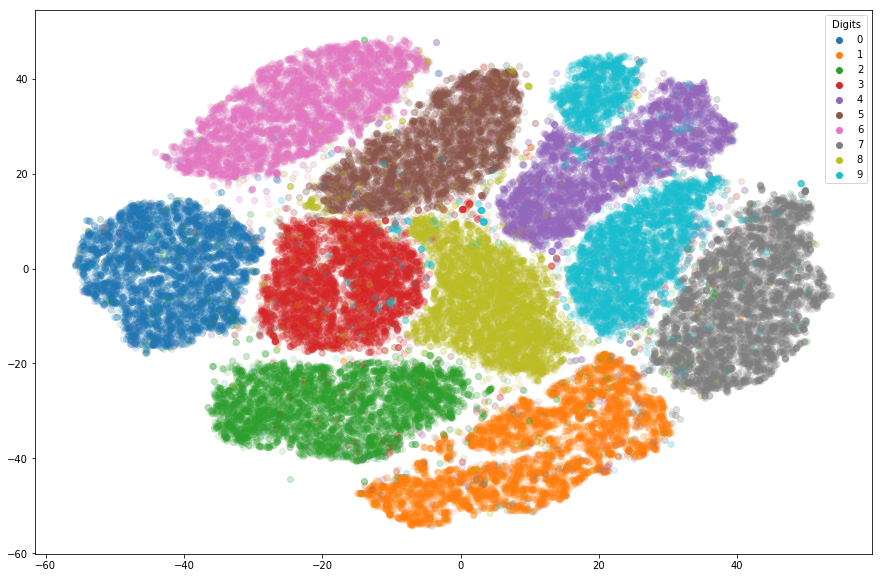

In [30]:
import numpy as np

# plot digits
digits = range(10)
for digit in digits:
    digit_index = np.argwhere(y == digit)
    plt.scatter(X_2d[digit_index, 0], X_2d[digit_index, 1], alpha=0.12, label=str(digit))

# customize legend
legend = plt.legend()
legend.set_title('Digits')
for handle in legend.legendHandles: 
    handle.set_alpha(1)

As we can see, the t-SNE model separated really well the data into the 10 different clusters. The only exception is between clusters of 4's and 9's, but it's pretty reasonable that it has problems distinguishing those two numbers.